In [1]:
# # setting the path for python to find ROOT
# import sys
# sys.path.append("/home/daniel/ROOT/build")
# sys.path.append("/home/daniel/ROOT/build/bin/")
# sys.path.append("/home/daniel/ROOT/build/include/")
# sys.path.append("/home/daniel/ROOT/build/lib/")

In [2]:
from math import *
import ROOT
from ROOT import gROOT 

Welcome to JupyROOT 6.15/01


### Setting PATH and loading libraries for Delphes and ExRootAnalysis 

In [3]:
# Delphes_Path="/home/daniel/Documents/Madgraph/MG5_aMC_v2_6_6/Delphes/"
Delphes_Path='/home/santiago/MG5_aMC_v2_6_5/Delphes'
ROOT.gSystem.AddDynamicPath(Delphes_Path)
ROOT.gSystem.Load("libDelphes.so");

# ER_Path="/home/daniel/Documents/Madgraph/MG5_aMC_v2_6_6/ExRootAnalysis/"
ER_Path="/home/santiago/MG5_aMC_v2_6_5/ExRootAnalysis/"
ROOT.gSystem.AddDynamicPath(ER_Path)
ROOT.gSystem.Load("libExRootAnalysis.so");

try:
    ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
    ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')
    print("Delphes classes imported")
except:
    pass

Delphes classes imported


Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExRootAnalysis/ExRootTreeReader.h
   requested to autoload type ExRootTreeReader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExRootAnalysis/ExRootTreeWriter.h
   requested to autoload type ExRootTreeWriter
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExRootAnalysis/ExRootTreeBranch.h
   requested to autoload type ExRootTreeBranch
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExRootAnalysis/ExRootResult.h
   requested to autoload type ExRootResult
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExRootAnalysis/ExRootClassifier.h
   requested to autoload type ExRootClassifier
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExRootAnalysis/ExRootFilter.h
   requested to autoload type ExRootFil

In [4]:
# Delphes_Path="/home/santiago/MG5_aMC_v2_6_5/Delphes/"
# ROOT.gSystem.AddDynamicPath(Delphes_Path)
# ROOT.gSystem.Load("libDelphes.so");

# ER_Path="/home/santiago/MG5_aMC_v2_6_5/ExRootAnalysis/"
# ROOT.gSystem.AddDynamicPath(ER_Path)
# ROOT.gSystem.Load("libExRootAnalysis.so");

# try:
#     ROOT.gInterpreter.Declare('#include "/home/santiago/MG5_aMC_v2_6_5/Delphes/classes/DelphesClasses.h"')
#     ROOT.gInterpreter.Declare('#include "/home/santiago/MG5_aMC_v2_6_5/ExRootAnalysis/ExRootAnalysis/ExRootTreeReader.h"')
#     print("Delphes classes imported")
# except:
#     pass

### Functions

In [5]:
def DeltaPhi(phi1,phi2):
    """
    Description: Returns the difference of
                 the two angles phi1 and phi2
    """
    PHI=phi1-phi2
    if PHI >= pi:
        PHI -= 2*pi
    elif PHI < -1*pi:
        PHI += 2*pi
    return PHI

def MaxValueHist(h1, h2):
    """
    Description: Returns the maximum value from 
                 both histograms h1 and h2
    """
    return max(h1.GetBinContent(h1.GetMaximumBin()),
               h2.GetBinContent(h2.GetMaximumBin()))*1.1

def Histos(hs, hb,savePath=None):
    """
    Description: Plot the two histograms hs and hb
                 in the same canvas
    """
    canvas = ROOT.TCanvas()
    canvas.cd()
    hs.Scale(1/hs.Integral())
    hb.Scale(1/hb.Integral())
    hs.SetStats(0)
    hb.SetStats(0)
    hb.SetLineColor(2)
    hs.SetMaximum(MaxValueHist(hs, hb))
    hs.SetLineColor(1)
#     hs.Draw("text")
    hs.Draw()
    hb.Draw("h,same")
    
    legend = ROOT.TLegend(0.6,0.6,0.9,0.9)
    #legend.AddEntry(hss, "Signal")
    #legend.AddEntry(hbb, "Background")
    legend.Draw()
    canvas.Update()
    canvas.Draw()
    if savePath != None:
        canvas.SaveAs(savePath)
    #gROOT.GetListOfCanvases().Draw()
    
def Histo(h,savePath=None):
    """
    Description: Plot a singular histogram h
    """
    canvas = ROOT.TCanvas()
    h.SetStats(0)
    canvas.cd()
    h.Draw("h")
    legend = ROOT.TLegend()
    legend.AddEntry(h, "Significance", "l")
    legend.Draw()
    canvas.Update()
    canvas.Draw()
    if savePath != None :
        canvas.SaveAs(savePath)
    #canvas.Update()
    #gROOT.GetListOfCanvases().Draw()     
    
def InvariantMass(jet,i,j):
    """
    Description: Returns the invariant mass for a system
                 made out of jet[i] and jet[j] in the branch jet
    """
    jets = [ROOT.TLorentzVector(), ROOT.TLorentzVector()]
    jets[0].SetPtEtaPhiE(jet.At(i).PT, jet.At(i).Eta, jet.At(i).Phi, jet.At(i).Mass)
    jets[1].SetPtEtaPhiE(jet.At(j).PT, jet.At(j).Eta, jet.At(j).Phi, jet.At(j).Mass)
    return abs((jets[0]+jets[1]).M())


def Sig(hs, hb, ns=50000, nb=50000, L=1000, sigmab=72.38, sigmas=13.76):
    """
    Description: Returns a significance histogram
                 made out of the signal and background 
                 histograms hs and hb
    
    L: Integrated luminosity in pb^-(1)
    
    ns, nb: Number of signal and background events
    
    sigmas, sigmab: cross sections for the signal and
                    background events in pb
    """
    hs.Scale((L*sigmas/ns))
    hb.Scale((L*sigmab/nb))
    hz = hb.Clone("SigHisto")
    hz.SetTitle("{} Significance".format(hs.GetTitle()))
    for i in range(hz.GetNbinsX()):
        s = hs.Integral(i+1,hz.GetNbinsX())
        b = hb.Integral(i+1,hz.GetNbinsX())
        if i==0:
            print("s:",s)
            print("b: ",b)
            print("Z: ",s/sqrt(s+b))
        if s+b != 0:
            hz.SetBinContent(i+1,s/sqrt(s+b))
        else:
            hz.SetBinContent(i+1,0)
        hz.SetBinError(i+1,0)
    return hz

### Reading trees and selecting branches

In [6]:
# getting signal and background trees
# signal
backgroundPath = './data/background/'
# signalPath = './data/VBF_MDSimp_EWKExcluded/daniel_run_05.root'
signalPath = './data/VBF_MDSimp_EWKExcluded/DMSimpSpin1_MY5000_MX1000.root'
fs = ROOT.TFile(signalPath)
s = fs.Get("Delphes")
# background
b = ROOT.TChain("Delphes")
#b.Add("/home/daniel/Documents/VBF/bg/santiago_run_01.root") #si
b.Add(backgroundPath + "santiago_run_02.root") #no
#b.Add("/home/daniel/Documents/VBF/bg/santiago_run_03.root") #si
b.Add("/home/daniel/Documents/VBF/bg/santiago_run_04.root") #si
# b.Add(backgroundPath + "santiago_run_05.root") #no
#b.Add("/home/daniel/Documents/VBF/bg/santiago_run_06.root") #si
# b.Add(backgroundPath + "santiago_run_07.root") #no

# number of signal and background events 
nb = int(b.GetEntries())
ns = int(s.GetEntries())

# number of bins to book histograms
nsBins = int(sqrt(ns))+1 
nbBins = int(sqrt(nb))+1 

# reading trees and selecting branches
treeS = ROOT.ExRootTreeReader(s)
treeB = ROOT.ExRootTreeReader(b)

jetS = treeS.UseBranch("Jet")
jetB = treeB.UseBranch("Jet")

metS = treeS.UseBranch("MissingET")
metB = treeB.UseBranch("MissingET")

Hs = treeS.UseBranch("ScalarHT")
Hb = treeB.UseBranch("ScalarHT")

# number of jets to use
numJets = 5

Error in <TFile::TFile>: file /home/daniel/Documents/VBF/bg/santiago_run_04.root does not exist
ExRootAnalysisDict dictionary payload:16:10: fatal error: 'ExRootAnalysis/ExRootTreeReader.h' file not found
#include "ExRootAnalysis/ExRootTreeReader.h"
         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Error in <TInterpreter::AutoParse>: Error parsing payload code for class ExRootTreeReader with content:

#line 1 "ExRootAnalysisDict dictionary payload"

#ifndef G__VECTOR_HAS_CLASS_ITERATOR
  #define G__VECTOR_HAS_CLASS_ITERATOR 1
#endif

#define _BACKWARD_BACKWARD_WARNING_H

/** \class ExRootAnalysisLinkDef
 *
 *  Lists classes to be included in cint dicitonary
 *
 *  \author P. Demin - UCL, Louvain-la-Neuve
 *
 */

#include "ExRootAnalysis/ExRootTreeReader.h"
#include "ExRootAnalysis/ExRootTreeWriter.h"
#include "ExRootAnalysis/ExRootTreeBranch.h"
#include "ExRootAnalysis/ExRootResult.h"
#include "ExRootAnalysis/ExRootUtilities.h"
#include "ExRootAnalysis/ExRootClassifier.h"
#include "ExRootAn

### Book histograms

In [7]:
# # signal
# hsPT = [ROOT.TH1F("hs{}PT".format(i+1), "jet[{}] P_T".format(i+1), 400, 0.0, 2000) for i in range(numJets)]
# hsEta = [ROOT.TH1F("hs{}Eta".format(i+1), "jet[{}] \eta".format(i+1), 100, -5, 5) for i in range(numJets)]
# hsDeltaEta = [ROOT.TH1F("hs{}DeltaEta".format(i+1), "|\Delta\eta(j{},MET)|".format(i+1), 100, 0, 10) for i in range(numJets)]
# hsDeltaPhi = [ROOT.TH1F("hs{}DeltaPhi".format(i+1), "|\Delta\phi(j{},MET)|".format(i+1), 100, 0, 10) for i in range(numJets)]
# hsH = ROOT.TH1F("hsH","H_T",200,0,1000)
# hsPTdiv = ROOT.TH1F("hsPT","P_{T}(j1)/P_{T}(j2)",nsBins,0,20)
# hsMetET = ROOT.TH1F("hsMetET", "MET_ET", 400, 0.0, 2000)
# hsMetPhi = ROOT.TH1F("hsMetPhi", "MET_PHI", 100, -5, 5)
# hsDeltaEtaJet = ROOT.TH1F("hsDeltaEtaJet", "Delta_Eta_Jet12", 50,0,10)
# hsDeltaEtaJetMax = ROOT.TH1F("hsDeltaEtaJetMax", "Max_Delta_Eta_Jet", 50,0,10)
# hsMass = ROOT.TH1F("hSMass", "M(j1,j2)", 150,0,1500)
# hsMassMax = ROOT.TH1F("hsMjj", "Max_M", 150,0,1500)

# # background
# hbPT = [ROOT.TH1F("hb{}PT".format(i+1), "jet[{}] P_T".format(i+1), 400, 0.0, 2000) for i in range(numJets)]
# hbEta = [ROOT.TH1F("hb{}Eta".format(i+1), "jet[{}] \eta".format(i+1), 100, -5, 5) for i in range(numJets)]
# hbDeltaEta = [ROOT.TH1F("hb{}DeltaEta".format(i+1), "|\Delta\eta(j{},MET)|".format(i+1), 100, 0, 10) for i in range(numJets)]
# hbDeltaPhi = [ROOT.TH1F("hb{}DeltaPhi".format(i+1), "|\Delta\phi(j{},MET)|".format(i+1), 100, 0, 10) for i in range(numJets)]
# hbH = ROOT.TH1F("hbH","H_T",200,0,1000)
# hbPTdiv = ROOT.TH1F("hbPT","P_{T}(j1)/P_{T}(j2)",nsBins,0,20)
# hbMetET = ROOT.TH1F("hbMetET", "MET_ET", 400, 0.0, 2000)
# hbMetPhi = ROOT.TH1F("hbMetPhi", "MET_PHI", 100, -5, 5)
# hbDeltaEtaJet = ROOT.TH1F("hbDeltaEtaJet", "Delta_Eta_Jet12", 50,0,10)
# hbDeltaEtaJetMax = ROOT.TH1F("hbDeltaEtaJetMax", "Max_Delta_Eta_Jet", 50,0,10)
# hbMass = ROOT.TH1F("hbMass", "M(j1,j2)", 150,0,1500)
# hbMassMax = ROOT.TH1F("hbMjj", "Max_M", 150,0,1500)

# signal
hsPT = [ROOT.TH1F("hs{}PT".format(i+1), "jet[{}] P_T".format(i+1), 1000, 0.0, 2000) for i in range(numJets)]
hsEta = [ROOT.TH1F("hs{}Eta".format(i+1), "jet[{}] \eta".format(i+1), 50, -5, 5) for i in range(numJets)]
hsDeltaEta = [ROOT.TH1F("hs{}DeltaEta".format(i+1), "|\Delta\eta(j{},MET)|".format(i+1), 50, 0, 10) for i in range(numJets)]
hsDeltaPhi = [ROOT.TH1F("hs{}DeltaPhi".format(i+1), "|\Delta\phi(j{},MET)|".format(i+1), 50, 0, 10) for i in range(numJets)]
hsH = ROOT.TH1F("hsH","H_T",50,0,1000)
hsPTdiv = ROOT.TH1F("hsPT","P_{T}(j1)/P_{T}(j2)",nsBins,0,20)
hsMetET = ROOT.TH1F("hsMetET", "MET_ET", 50, 0.0, 2000)
hsMetPhi = ROOT.TH1F("hsMetPhi", "MET_PHI", 50, -5, 5)
hsDeltaEtaJet = ROOT.TH1F("hsDeltaEtaJet", "Delta_Eta_Jet12", 50,0,10)
hsDeltaEtaJetMax = ROOT.TH1F("hsDeltaEtaJetMax", "Max_Delta_Eta_Jet", 50,0,10)
hsMass = ROOT.TH1F("hSMass", "M(j1,j2)", 50,0,1500)
hsMassMax = ROOT.TH1F("hsMjj", "Max_M", 50,0,1500)

# background
hbPT = [ROOT.TH1F("hb{}PT".format(i+1), "jet[{}] P_T".format(i+1), 1000, 0.0, 2000) for i in range(numJets)]
hbEta = [ROOT.TH1F("hb{}Eta".format(i+1), "jet[{}] \eta".format(i+1), 50, -5, 5) for i in range(numJets)]
hbDeltaEta = [ROOT.TH1F("hb{}DeltaEta".format(i+1), "|\Delta\eta(j{},MET)|".format(i+1), 50, 0, 10) for i in range(numJets)]
hbDeltaPhi = [ROOT.TH1F("hb{}DeltaPhi".format(i+1), "|\Delta\phi(j{},MET)|".format(i+1), 50, 0, 10) for i in range(numJets)]
hbH = ROOT.TH1F("hbH","H_T",50,0,1000)
hbPTdiv = ROOT.TH1F("hbPT","P_{T}(j1)/P_{T}(j2)",nsBins,0,20)
hbMetET = ROOT.TH1F("hbMetET", "MET_ET", 50, 0.0, 2000)
hbMetPhi = ROOT.TH1F("hbMetPhi", "MET_PHI", 50, -5, 5)
hbDeltaEtaJet = ROOT.TH1F("hbDeltaEtaJet", "Delta_Eta_Jet12", 50,0,10)
hbDeltaEtaJetMax = ROOT.TH1F("hbDeltaEtaJetMax", "Max_Delta_Eta_Jet", 50,0,10)
hbMass = ROOT.TH1F("hbMass", "M(j1,j2)", 50,0,1500)
hbMassMax = ROOT.TH1F("hbMjj", "Max_M", 50,0,1500)

### Selecting events and filling histograms

In [8]:
# Loop over all signal events 
for event in range(ns):
    #Load selected branches with data from specified event
    treeS.ReadEntry(event)
    
    # cuts
#     # select events with MET > 200 GeV
#     if metS.At(0).MET < 200: continue
    # select events with at least 2 jets
    if jetS.GetEntries() < 2: continue
#     # select events with jets in opposite hemispheres 
    if (jetS.At(0).Eta * jetS.At(1).Eta) >= 0: continue
#     # select events with jet1 and jet2 PT > 60
#     if jetS.At(0).PT < 30: continue
#     if jetS.At(1).PT < 30: continue
#     if InvariantMass(jetS,0,1) < 750: continue
#     if abs(jetS.At(0).Eta-jetS.At(1).Eta) <= 4.2: continue
#     if abs(jetS.At(0).Eta) >= 5: continue
#     if abs(jetS.At(1).Eta) >= 5: continue
#     if Hs.At(0).HT <= 200 : continue

    JsMass = 0
    i = 0
    k = 0
    NJets = jetS.GetEntries() if jetS.GetEntries() <= numJets else numJets
    for n in range(NJets):
        hsPT[n].Fill(jetS.At(n).PT)
        hsDeltaPhi[n].Fill(abs(DeltaPhi(metS.At(0).Phi,jetS.At(n).Phi)) )
        hsDeltaEta[n].Fill(abs(metS.At(0).Eta-jetS.At(n).Eta))
        # selecting the two jet system 
        # with the largest invariant mass
        for m in range(NJets):
            if n==m:continue
            a = InvariantMass(jetS,n,m) 
            if a > JsMass:
                i, k = n,m
                JsMass = a  
    hsPTdiv.Fill(jetS.At(0).PT/jetS.At(1).PT)
    hsH.Fill(Hs.At(0).HT)
    hsMetET.Fill(metS.At(0).MET)
    hsMetPhi.Fill(metS.At(0).Phi) 
    
    hsDeltaEtaJet.Fill(abs(jetS.At(0).Eta-jetS.At(1).Eta))
    hsDeltaEtaJetMax.Fill(abs(jetS.At(i).Eta-jetS.At(k).Eta))
    
    hsMass.Fill(InvariantMass(jetS,0,1)) 
    hsMassMax.Fill(InvariantMass(jetS,i,k))

In file included from ClassesDict dictionary payload:34:
/home/santiago/MG5_aMC_v2_6_5/Delphes/classes/DelphesModule.h:30:10: fatal error: 'ExRootAnalysis/ExRootTask.h' file not found
#include "ExRootAnalysis/ExRootTask.h"
         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Error in <TInterpreter::AutoParse>: Error parsing payload code for class Jet with content:

#line 1 "ClassesDict dictionary payload"

#ifndef G__VECTOR_HAS_CLASS_ITERATOR
  #define G__VECTOR_HAS_CLASS_ITERATOR 1
#endif

#define _BACKWARD_BACKWARD_WARNING_H
/*
 *  Delphes: a framework for fast simulation of a generic collider experiment
 *  Copyright (C) 2012-2014  Universite catholique de Louvain (UCL), Belgium
 *
 *  This program is free software: you can redistribute it and/or modify
 *  it under the terms of the GNU General Public License as published by
 *  the Free Software Foundation, either version 3 of the License, or
 *  (at your option) any later version.
 *
 *  This program is distributed in the hope that it will be u

In [9]:
# Loop over all background events 
for event in range(ns):
    # load selected branches with data from specified event
    treeB.ReadEntry(event)
    
    # cuts
#     # select events with MET > 200 GeV
#     if metB.At(0).MET < 200: continue
    # select events with at least 2 jets
    if jetB.GetEntries() < 2: continue
    # select events with jets in opposite hemispheres 
    if (jetB.At(0).Eta * jetB.At(1).Eta) >= 0: continue
#     # select events with jet1 and jet2 PT > 60
#     if jetB.At(0).PT <= 30: continue
#     if jetB.At(1).PT <= 30: continue
#     if InvariantMass(jetB,0,1) <= 750: continue
#     if abs(jetB.At(0).Eta-jetB.At(1).Eta) <= 4.2: continue
#     if abs(jetB.At(0).Eta) >= 5: continue
#     if abs(jetB.At(1).Eta) >= 5: continue
#     if Hb.At(0).HT <= 200 : continue
        
    JbMass = 0
    i, k = 0,0
    
    NJets = jetB.GetEntries() if jetB.GetEntries() <= numJets else numJets
    for n in range(NJets):
        hbPT[n].Fill(jetB.At(n).PT)
        hbDeltaPhi[n].Fill(abs(DeltaPhi(metB.At(0).Phi,jetB.At(n).Phi)))
        hbDeltaEta[n].Fill(abs(metB.At(0).Eta-jetB.At(n).Eta))
        # selecting the two jet system 
        # with the largest invariant mass
        for m in range(NJets):
            if n==m:continue
            a = InvariantMass(jetB,n,m) 
            if a > JbMass:
                i, k = n,m
                JbMass = a 
    hbPTdiv.Fill(jetB.At(0).PT/jetB.At(1).PT)
    hbH.Fill(Hb.At(0).HT)
    hbMetET.Fill(metB.At(0).MET)
    hbMetPhi.Fill(metB.At(0).Phi)
    
    hbDeltaEtaJet.Fill(abs(jetB.At(0).Eta-jetB.At(1).Eta))
    hbDeltaEtaJetMax.Fill(abs(jetB.At(i).Eta-jetB.At(k).Eta))
    
    hbMass.Fill(InvariantMass(jetB,0,1)) 
    hbMassMax.Fill(InvariantMass(jetB,i,k))   

### MET_ET

Info in <TCanvas::SaveSource>: C++ Macro file: ./images/COMHEP/cuts26_11_09/met.C has been generated


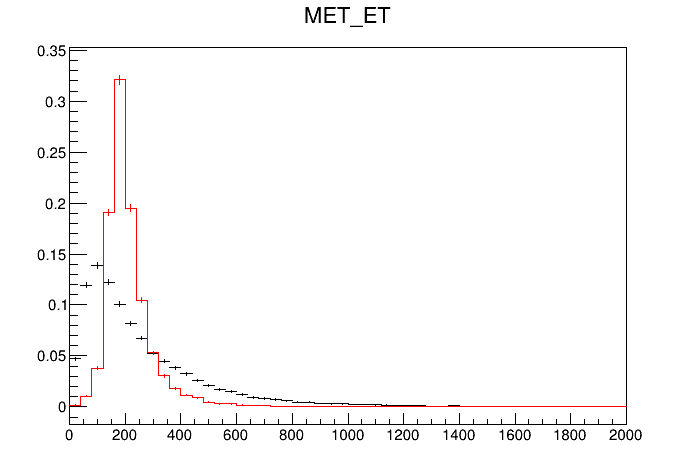

In [10]:
Hs = hsMetET.Clone("MetSHisto")
Hb = hbMetET.Clone("MetBHisto")
Histos(Hs,Hb,'./images/COMHEP/cuts26_11_09/met.C')

('s:', 5792.1343384981155)
('b: ', 25912.166711211205)
('Z: ', 32.52966077506296)


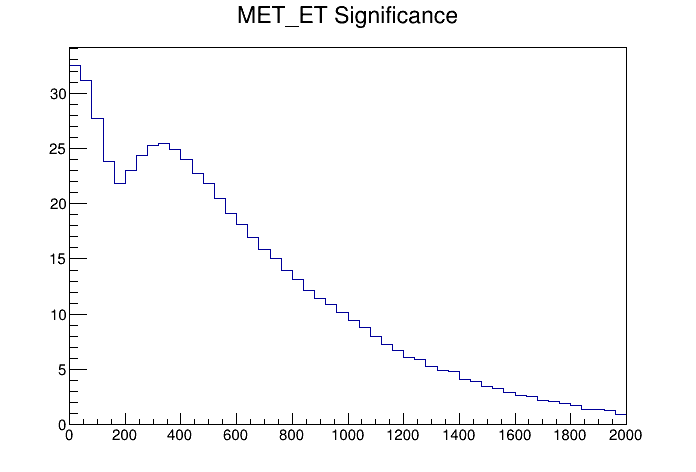

In [11]:
hzMET = Sig(hsMetET, hbMetET, ns=ns, nb=nb)
Histo(hzMET)

## Jet_PT

Info in <TCanvas::SaveSource>: C++ Macro file: ./images/COMHEP/cuts26_11_09/pt1.C has been generated


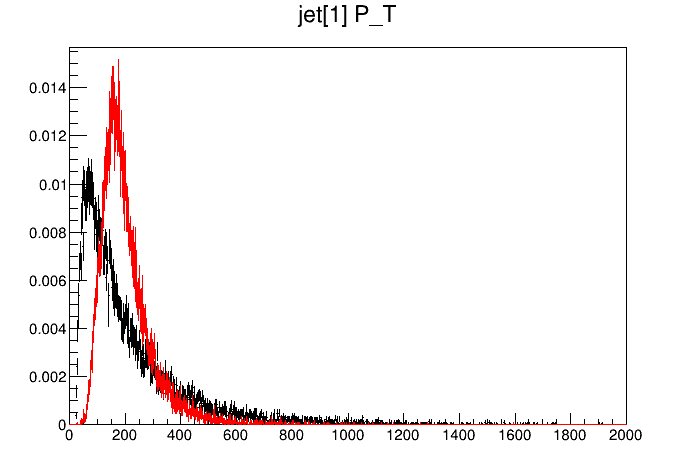

In [12]:
Hspt = hsPT[0].Clone()
Hbpt = hbPT[0].Clone()
Histos(Hspt,Hbpt,'./images/COMHEP/cuts26_11_09/pt1.C')

('s:', 5791.859222650528)
('b: ', 25912.167041540146)
('Z: ', 32.528256639066825)


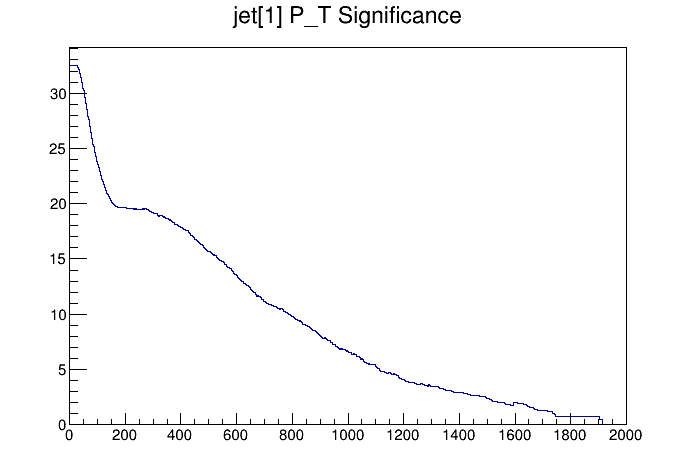

In [13]:
hzPT = Sig(hsPT[0], hbPT[0], ns=ns, nb=nb)
Histo(hzPT)

Info in <TCanvas::SaveSource>: C++ Macro file: ./images/COMHEP/cuts26_11_09/pt2.C has been generated


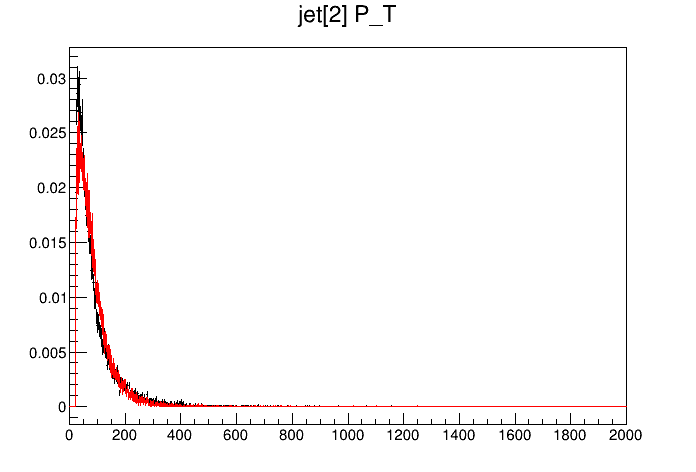

In [14]:
Hspt = hsPT[1].Clone()
Hbpt = hbPT[1].Clone()
Histos(Hspt,Hbpt,'./images/COMHEP/cuts26_11_09/pt2.C')

('s:', 5793.785613656044)
('b: ', 25912.16715300083)
('Z: ', 32.53808706467998)


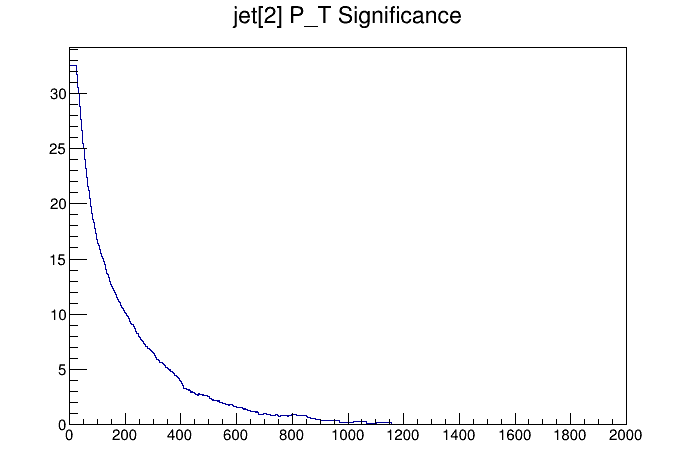

In [15]:
hzPT = Sig(hsPT[1], hbPT[1], ns=ns, nb=nb)
Histo(hzPT)

## Delta_Eta

Info in <TCanvas::SaveSource>: C++ Macro file: ./images/COMHEP/cuts26_11_09/deltaEta_j12.C has been generated


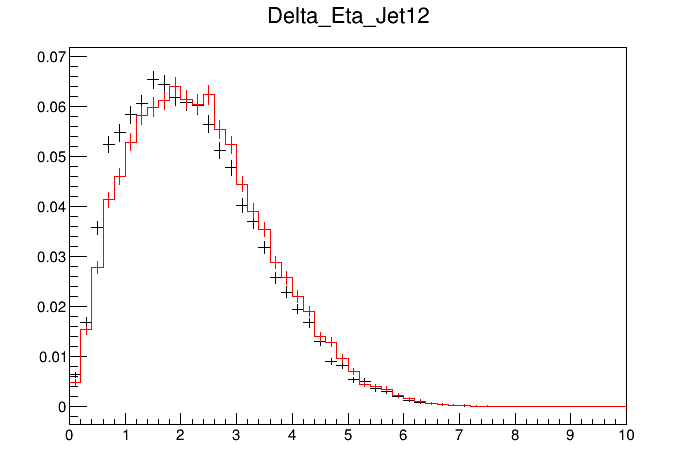

In [16]:
HzsDEta = hsDeltaEtaJet.Clone()
HzbDEta = hbDeltaEtaJet.Clone()
Histos(HzsDEta,HzbDEta,'./images/COMHEP/cuts26_11_09/deltaEta_j12.C')

('s:', 5793.785515904427)
('b: ', 25912.167014718056)
('Z: ', 32.53808663681834)


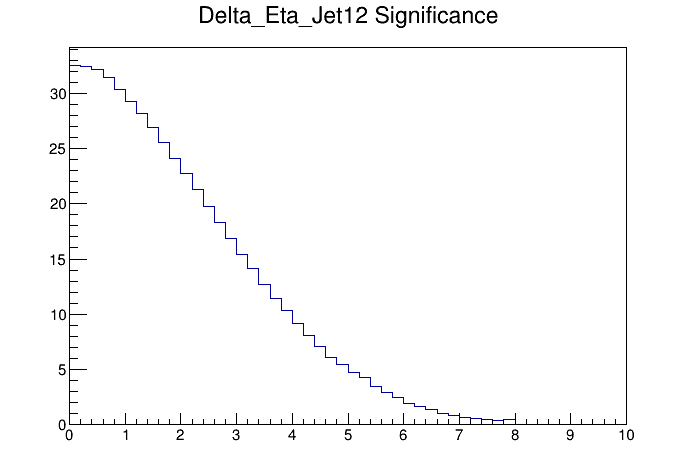

In [17]:
HzDeltaEtaJet = Sig(hsDeltaEtaJet, hbDeltaEtaJet, ns=ns, nb=nb)
Histo(HzDeltaEtaJet)

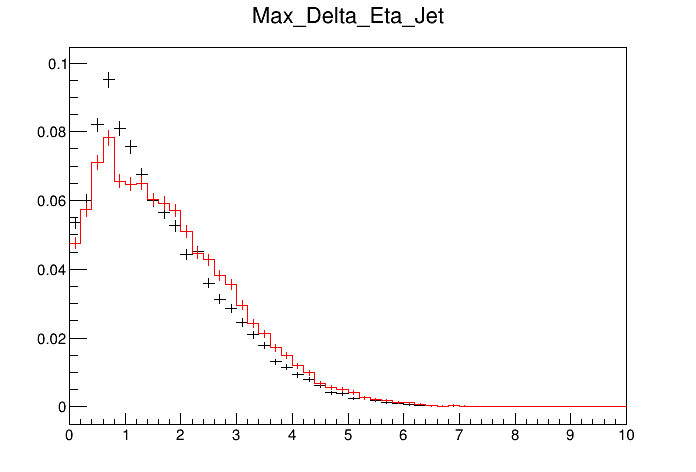

In [18]:
HszDJ = hsDeltaEtaJetMax.Clone()
HbzDJ = hbDeltaEtaJetMax.Clone()
Histos(HszDJ,HbzDJ)

('s:', 5793.785565018654)
('b: ', 25912.1672103405)
('Z: ', 32.538086787065495)


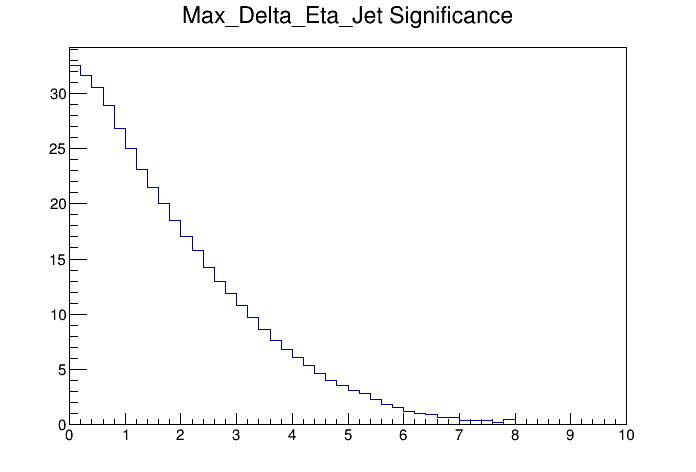

In [19]:
HzDJ = Sig(hsDeltaEtaJetMax, hbDeltaEtaJetMax, ns=ns, nb=nb)
Histo(HzDJ)

## Invariant Mass

Info in <TCanvas::SaveSource>: C++ Macro file: ./images/COMHEP/cuts26_11_09/m_j1_j2.C has been generated


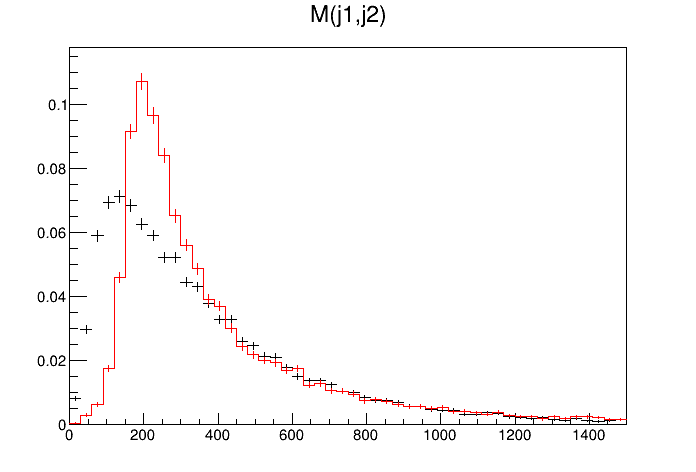

In [20]:
HzsMass = hsMass.Clone()
HzbMass = hbMass.Clone()
Histos(HzsMass,HzbMass,'./images/COMHEP/cuts26_11_09/m_j1_j2.C')

('s:', 5732.691139698029)
('b: ', 25236.878602027893)
('Z: ', 32.57549007070342)


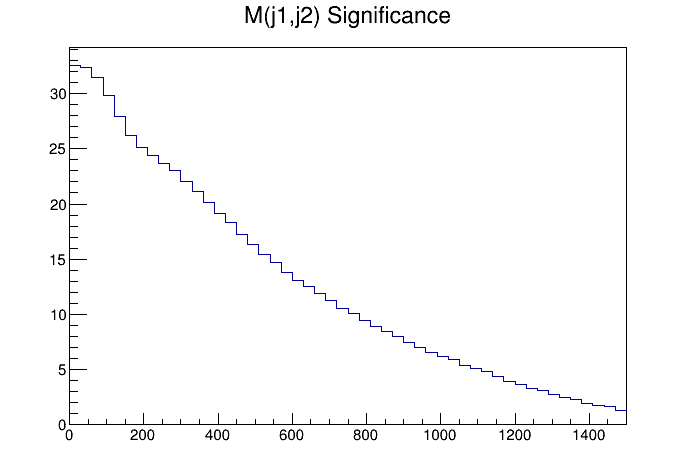

In [21]:
HzMass = Sig(hsMass, hbMass, ns=ns, nb=nb)
Histo(HzMass)

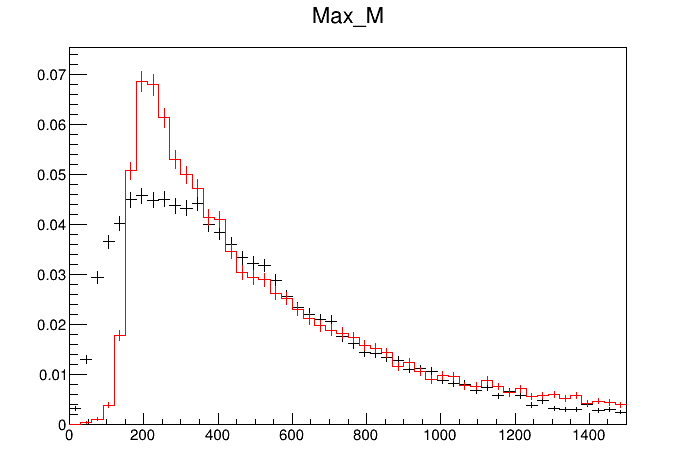

In [22]:
HzsM = hsMassMax.Clone()
HzbM = hbMassMax.Clone()
Histos(HzsM,HzbM)

('s:', 5632.793601989746)
('b: ', 24143.413359761238)
('Z: ', 32.64293128583412)


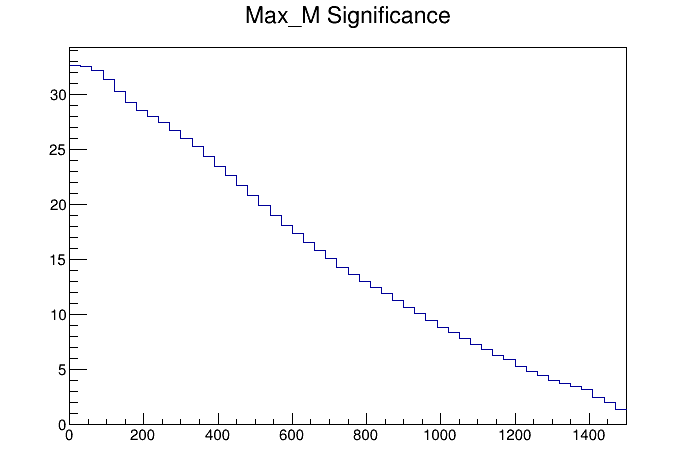

In [23]:
HzM = Sig(hsMassMax, hbMassMax, ns=ns, nb=nb)
Histo(HzM)

## HT

Info in <TCanvas::SaveSource>: C++ Macro file: ./images/COMHEP/cuts26_11_09/ht.C has been generated


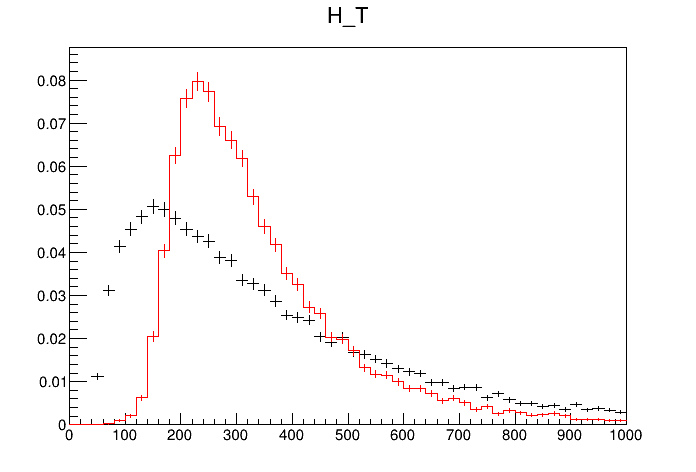

In [24]:
Hs = hsH.Clone("HtHisto")
Hb = hbH.Clone("HtHisto")
Histos(Hs,Hb,'./images/COMHEP/cuts26_11_09/ht.C')

In [25]:
L=1000
sigmab=72.38
sigmas=13.76

hsH.Scale((L*sigmas/ns))
hbH.Scale((L*sigmab/nb))

s = hsH.Integral()
b = hbH.Integral()
print("s = {0}".format(s))
print("b = {0}".format(b))
print("sig = {0}".format(s/sqrt(s+b)))

s = 5543.35359573
b = 25638.8008105
sig = 31.3920388446


In [26]:
print(hsH.GetEntries())

21053.0
